
# Red neuronal convolucional usando banco de datos de imagenes


## Importamos las librerias

In [27]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
#Revisamos la version de tensorflow
tf.__version__

'2.12.0'

## Pre-Procesamiento de Datos

In [28]:
#Especificamos los parametros del generador ENTRENAMIENTO donde tambien especificamos lo del 20% es validation split
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split=0.2)
#Especificamos parametros del generador VALIDACION
validation_datagen = ImageDataGenerator(rescale=1./255)

In [30]:
train_generator = train_datagen.flow_from_directory('training_set',target_size=(224, 224),batch_size=32,class_mode='binary',subset='training')
#Utilizamos el mismo datagen
validation_generator = train_datagen.flow_from_directory('training_set',target_size=(224, 224),batch_size=32,class_mode='binary',subset='validation')
test_set = train_datagen.flow_from_directory('test_set', target_size=(224, 224), batch_size=32, class_mode='binary')

Found 6400 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


## Creacion de la red

### Creamos el modelo

In [31]:
model = Sequential()

### Agregar capa convolucional

In [32]:
model.add(Conv2D(7, (3, 3), strides=(2, 2), activation='relu', input_shape=(224, 224, 3))) 

### Agregar capa de max pooling

In [33]:
model.add(MaxPooling2D(pool_size=(3,3), strides=(2, 2)))

### Aplanar el maxpooling

In [34]:
model.add(Flatten())

### Agregar capa completamente conectada

In [35]:
model.add(Dense(units=128, activation='relu'))

### Agregar capa de salida

In [36]:
model.add(Dense(units=1, activation='sigmoid'))

## Entrenando la Red

### Compilando

In [37]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 111, 111, 7)       196       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 55, 55, 7)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 21175)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               2710528   
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,710,853
Trainable params: 2,710,853
Non-trainable params: 0
____________________________________________

### Entrenando

In [39]:
history_callback = model.fit(train_generator,steps_per_epoch=len(train_generator),epochs=100,validation_data=test_set,validation_steps=len(test_set))

Epoch 1/100
200/200 [==============================] - 219s 1s/step - loss: 0.8326 - accuracy: 0.5544 - val_loss: 0.6703 - val_accuracy: 0.5925
Epoch 2/100
200/200 [==============================] - 224s 1s/step - loss: 0.6460 - accuracy: 0.6177 - val_loss: 0.6745 - val_accuracy: 0.5935
Epoch 3/100
200/200 [==============================] - 215s 1s/step - loss: 0.6192 - accuracy: 0.6666 - val_loss: 0.6048 - val_accuracy: 0.6920
Epoch 4/100
200/200 [==============================] - 213s 1s/step - loss: 0.5990 - accuracy: 0.6800 - val_loss: 0.5958 - val_accuracy: 0.6865
Epoch 5/100
200/200 [==============================] - 212s 1s/step - loss: 0.5927 - accuracy: 0.6828 - val_loss: 0.5852 - val_accuracy: 0.6845
Epoch 6/100
200/200 [==============================] - 213s 1s/step - loss: 0.5729 - accuracy: 0.6995 - val_loss: 0.5694 - val_accuracy: 0.7065
Epoch 7/100
200/200 [==============================] - 214s 1s/step - loss: 0.5605 - accuracy: 0.7125 - val_loss: 0.5654 - val_accuracy:

## Graficar 

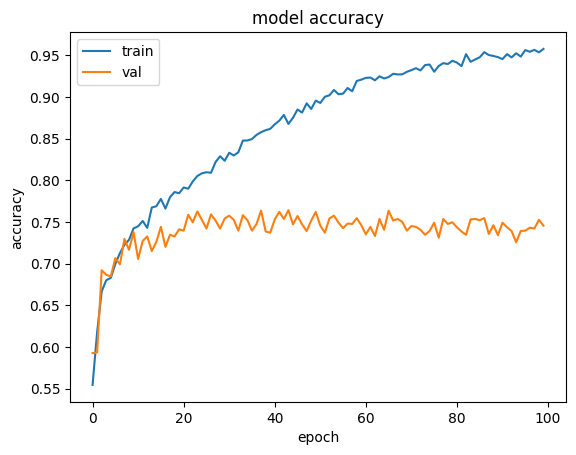

In [41]:
from matplotlib import pyplot as plt

plt.plot(history_callback.history['accuracy'])
plt.plot(history_callback.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

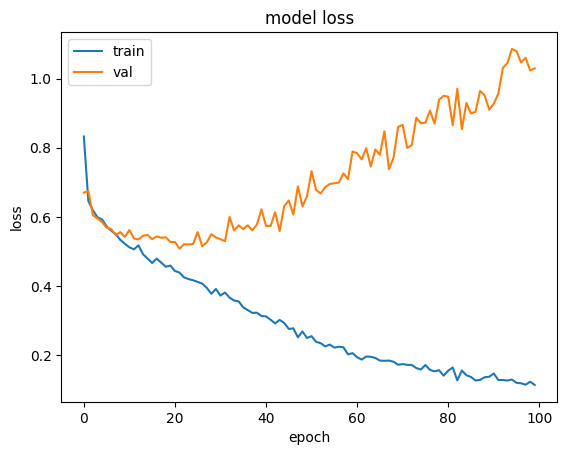

In [42]:
plt.plot(history_callback.history['loss'])
plt.plot(history_callback.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Prediccion y evaluacion

In [43]:
predictions = model.predict(test_set)
predicted_labels = [1 if prediction > 0.5 else 0 for prediction in predictions]
print(predicted_labels)

63/63 [==============================] - 47s 740ms/step
[1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
y_pred = model.predict(test_set)
y_pred = (y_pred > 0.5)  # Convertir las probabilidades en clases binarias (0 o 1)
y_true = test_set.classes
cm = confusion_matrix(y_true, y_pred)
acu = accuracy_score(y_true, y_pred)
pre = precision_score(y_true, y_pred, average='macro')
re = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

63/63 [==============================] - 49s 775ms/step


0.49934667491919393